<left>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/AGH_University_of_Science_and_Technology_Logo.svg/215px-AGH_University_of_Science_and_Technology_Logo.svg.png" width="30" alt="cognitiveclass.ai logo">
</left>

<center>
    <img src="https://lh5.googleusercontent.com/proxy/iKWeNxZa18rTIvWLrErjPakrMIDTg7-pKIEyry8UXOw6dcccHKbnvrAWpQ7rbW_e7JpMWeB2bBbQeahw6INX5q3KjZPzji0FTHQDhwsQ0a2ZKw" width="300" alt="cognitiveclass.ai logo">
</center>




# Semiconductor Diode

Understanding the properties of layered **P-N** semiconductor junctions.

## Objectives

To analyze and plot the results of electronic measurements of a set of Semiconductor Diodes. According to the instructions these are:

*   Forward Bias Analysis
*   Reverse Bias Analysis


<h3>Table of Contents</h3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Forward Bias Analysis"><b>Forward Bias Analysis</b></a></li>
        <li><a href="#Step 1: Natural Logarithm of Current versus the Voltage for all diodes">Step 1: Natural Logarithm of Current versus the Voltage for all diodes</a></li>
        <li><a href="#Step 2: Linearized Plot for Si Diode">Step 2: Linearized Plot for Si Diode</a></li>
        <li><a href="#Step 3: Voltage Shift Between Si and Ge Diodes">Step 3: Voltage Shift Between Si and Ge Diodes</a></li>
        <li><a href="#Step 4: Energy Gap of LED">Step 4: Energy Gap of LED</a></li>
        <li><a href="#Step 5: Identify the Material of the Zener Diode">Step 5: Identify the Material of the Zener Diode</a></li>
    </ul>
<ul>
        <li><a href="#Reverse Bias Analysis"><b>Reverse Bias Analysis</b></a></li>
        <li><a href="#Step 6: Plot Logarithm Current vs. Voltage for each diode under Reverse Bias">Step 6: Plot Logarithm Current vs. Voltage for each diode under Reverse Bias</a></li>
        <li><a href="#Step 7: Determine the Zener voltage">Step 7: Determine the Zener voltage</a></li>
        <li><a href="#Step 8: Calculate the Stabilization Coefficient for the Zener diode">Step 8: Calculate the Stabilization Coefficient for the Zener diode</a></li>
    </ul>
</div>

<hr>

# Forward Bias Analysis

First, we import neccessary libraries:

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Step 1: Natural Logarithm of Current versus the Voltage for all diodes

We use corrected data for Forward Bias to calculate the natural logarithm of the current $(I)$ values.

Let's use this corrected data to create the DataFrame and plot the graphs:

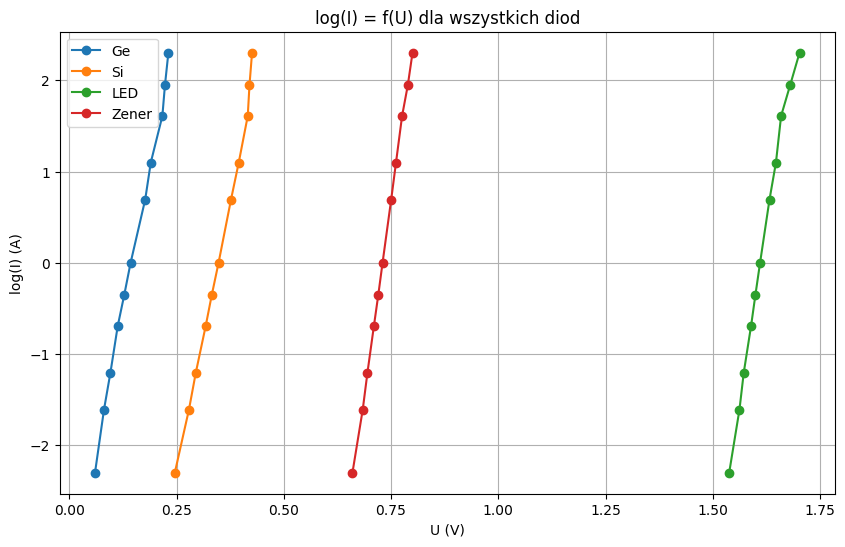

,I (mA),Ge (V),Si (V),LED (V),Zener (V)
0,0.1,0.060,0.246,1.538,0.6600
1,0.2,0.081,0.279,1.562,0.6840
2,0.3,0.096,0.295,1.572,0.6950
3,0.5,0.113,0.318,1.589,0.7100
4,0.7,0.128,0.332,1.599,0.7201
5,1.0,0.143,0.348,1.610,0.7302
6,2.0,0.177,0.377,1.632,0.7503
7,3.0,0.190,0.395,1.647,0.7615
8,5.0,0.217,0.416,1.659,0.7757
9,7.0,0.223,0.420,1.680,0.7890


In [58]:
# Corrected data for forward bias (Table 1)
forward_data = {
    "I (mA)": [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0],
    "Ge (V)": [0.06, 0.081, 0.096, 0.113, 0.128, 0.143, 0.177, 0.190, 0.217, 0.223, 0.231],
    "Si (V)": [0.246, 0.279, 0.295, 0.318, 0.332, 0.348, 0.377, 0.395, 0.416, 0.420, 0.426],
    "LED (V)": [1.538, 1.562, 1.572, 1.589, 1.599, 1.610, 1.632, 1.647, 1.659, 1.680, 1.702],
    "Zener (V)": [0.6600, 0.6840, 0.6950, 0.7100, 0.7201, 0.7302, 0.7503, 0.7615, 0.7757, 0.7890, 0.8000]
}

# Convert to DataFrame
df_forward = pd.DataFrame(forward_data)

# Plot log(I) = f(U) for all diodes
plt.figure(figsize=(10, 6))

for diode in ["Ge (V)", "Si (V)", "LED (V)", "Zener (V)"]:
    plt.plot(df_forward[diode], np.log(df_forward["I (mA)"]), marker='o', label=diode.split()[0])

plt.xlabel("U (V)")
plt.ylabel("log(I) (A)")
plt.title("log(I) = f(U) for all diodes")
plt.legend()
plt.grid(True)
plt.show()

df_forward

### Step 2: Linearized Plot for <i>Si</i> Diode

We fit a straight line to the data points, then we calculate the slope $(m)$ and intercept from the linear fit. 

To find the ideality factor $n$, we use the equation for the diode current: 

$$I=I_{0} \exp (\frac{qV}{nkT})$$


Taking the natural logarithm:

$$ln(I)=ln(I_{0})+(\frac{qV}{nkT})$$

The slope $m$ of the linear fit is related to the ideality factor $n$ by:

$$m =  \displaystyle \frac{q}{nkT}$$

Where:

$q$ is the <b>Electron Charge</b> $(1.602×10^{−19} C)$ 

$k$ is <b>Boltzmann's constant</b> $(1.381×10^{−23} J/K)$

$T$ is the <b>temperature in Kelvin</b> (assuming room temperature, $T≈300 KT≈300K$)

Then we use the equation: $$n =  \displaystyle \frac{q}{mkT}$$ to calculate the ideality factor $n$.

In [49]:
# Linearized plot for Si diode
U_Si = df_forward["Si (V)"]
I = df_forward["I (mA)"] * 1e-3  # Convert mA to A for logarithm calculation

# Linear fit
slope, intercept, r_value, p_value, std_err = linregress(U_Si, np.log(I))

# Constants
q = 1.602e-19  # Charge of an electron in Coulombs
k = 1.381e-23  # Boltzmann's constant in J/K
T = 300  # Temperature in Kelvin

# Calculate ideality factor n
n = q / (slope * k * T)
print("Ideality Factor n:", n)

Ideality Factor n: 1.5742264281367608


After conducting <b>Linear Fit</b>, defining constants and calculating <b>Ideality Factor</b> we can plot the data:

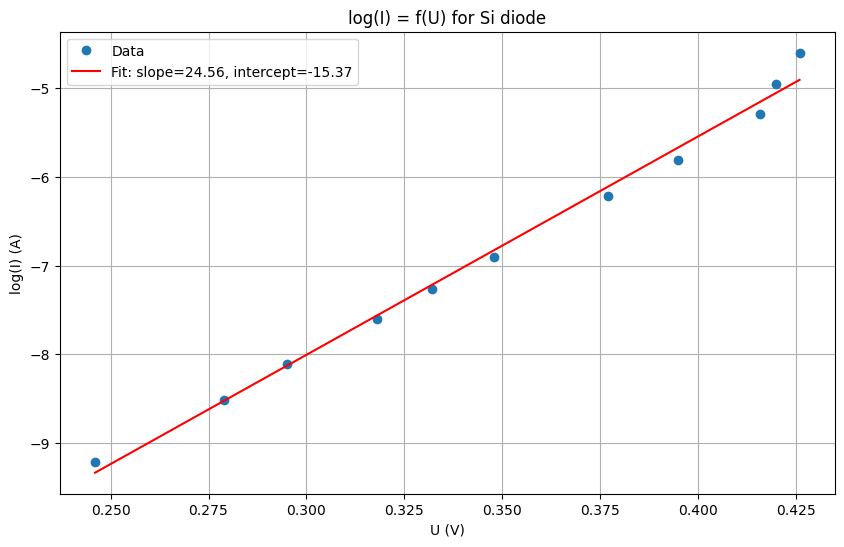

In [60]:
# Plot the linearized data and the fit
plt.figure(figsize=(10, 6))
plt.plot(U_Si, np.log(I), 'o', label='Data')
plt.plot(U_Si, intercept + slope * U_Si, 'r', label=f'Fit: slope={slope:.2f}, intercept={intercept:.2f}')
plt.xlabel("U (V)")
plt.ylabel("log(I) (A)")
plt.title("log(I) = f(U) for Si diode")
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Voltage Shift Between <i>Si</i> and <i>Ge</i> Diodes

Using the same current value, we can calculate the voltage difference ($U_{Si}$ - $U_{Ge}$) and compare it to the energy gap difference:

In [48]:
# Calculate voltage shift between Si and Ge for I = 1 mA
U_Si_1mA = df_forward.loc[df_forward["I (mA)"] == 1.0, "Si (V)"].values[0]
U_Ge_1mA = df_forward.loc[df_forward["I (mA)"] == 1.0, "Ge (V)"].values[0]
voltage_shift_Si_Ge = U_Si_1mA - U_Ge_1mA
print("Voltage Shift Between Si and Ge Diodes:", voltage_shift_Si_Ge)

Voltage Shift Between Si and Ge Diodes: 0.205


### Step 4: Energy Gap of LED

Using the voltage shift between the <i>Si</i> and LED diodes and the known energy gap for <i>Si</i>, we can estimate the energy gap of the LED material using the known energy gap of <i>Si</i> and the voltage shift: ${E_{g}^{LED} = E_{g}^{Si} + \Delta U }$

In [51]:
# Energy gaps
Eg_Si = 1.12  # eV for Silicon
Eg_Ge = 0.66  # eV for Germanium
Eg_LED_estimated = Eg_Si + voltage_shift_Si_Ge



print("Ideality Factor, Voltage Shift and estimation of LED Energy Gap:", n, voltage_shift_Si_Ge, Eg_LED_estimated)

Ideality Factor, Voltage Shift and estimation of LED Energy Gap: 1.5742264281367608 0.205 1.3250000000000002


### Step 5: Identify the Material of the Zener Diode

Based on the Zener voltage characteristics, we can deduce the likely material by comparing it with known Zener voltages for different materials.

The Zener voltage ($U_{z}$) typically gives a clue about the material used. For example:

    Silicon (Si) Zener diodes often have Zener voltages in the range of 3.3V to 12V.
    
    Germanium (Ge) Zener diodes have lower breakdown voltages, typically below 3V.

From the provided data, the Zener diode's voltage characteristics are given. We'll analyze these to estimate the material at approximately 5 <i>mA</i> to decide if it's more likely to be Germanium or Silicon:

In [75]:
# Zener diode data from Table 1 for forward bias and Table 2 for reverse bias
zener_forward_voltage = [0.6600, 0.6840, 0.6950, 0.7100, 0.7201, 0.7302, 0.7503, 0.7615, 0.7757, 0.7890, 0.8000]
reverse_voltage = [1.3881, 1.5271, 1.6111, 1.7381, 1.8261, 1.9192, 2.0402, 2.1192, 2.2552, 2.3260, 2.4260, 2.5210, 2.6556, 2.7110, 2.8110, 2.8300]
reverse_current_mA = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# Reverse characteristic voltage where current is close to 5 mA
zener_current_mA = 5.0
zener_voltage_5mA = 2.4260  # Value at 5 mA from reverse current data

# Determine the material
if zener_voltage_5mA < 3.0:
    material = "Germanium"
elif 3.3 <= zener_voltage_5mA <= 12:
    material = "Silicon"
else:
    material = "Unknown"

print("Most likely material of the Zener Diode is", material)

Most likely material of the Zener Diode is Germanium


# Reverse Bias Analysis

### Step 6: Plot Logarithm of Current vs. Voltage for each diode under Reverse Bias

From Table 2, we have current <i>(I)</i> and voltage <i>(U)</i> for different diodes under reverse bias. We'll plot these for each diode separately:

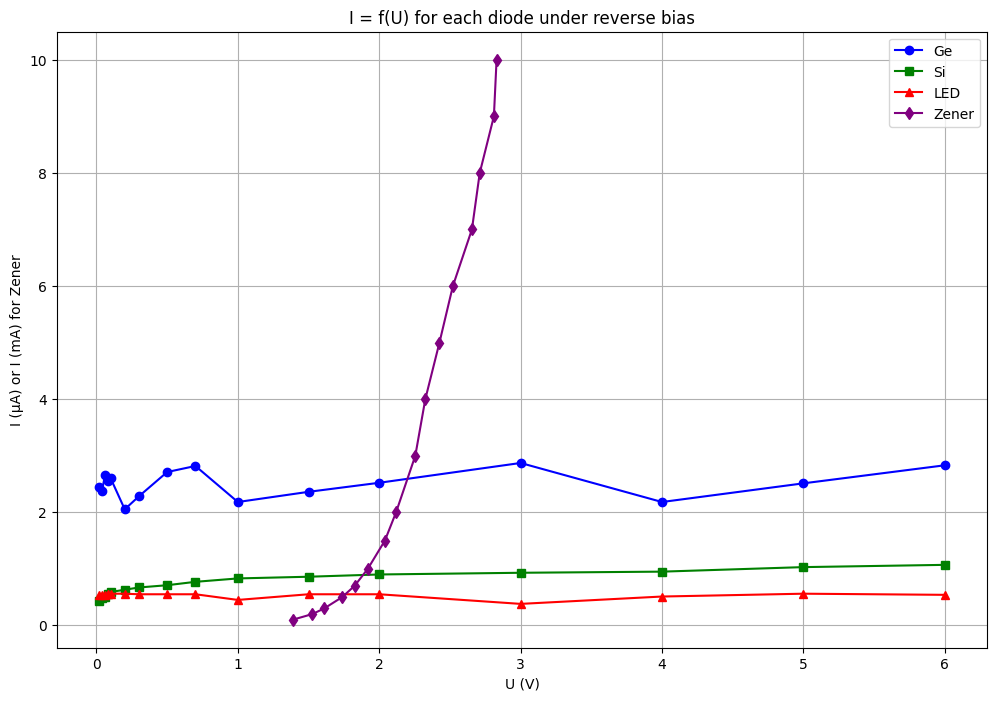

,U (V),Ge (µA),Si (µA),LED (µA),Zener (mA),Zener Voltage (V)
0,0.02,2.4430,0.43,0.54,0.1,1.3881
1,0.04,2.3840,0.49,0.54,0.2,1.5271
2,0.06,2.6560,0.51,0.54,0.3,1.6111
3,0.08,2.5480,0.56,0.55,0.5,1.7381
4,0.10,2.6015,0.59,0.56,0.7,1.8261
5,0.20,2.0517,0.63,0.56,1.0,1.9192
6,0.30,2.2817,0.67,0.55,1.5,2.0402
7,0.50,2.7110,0.71,0.55,2.0,2.1192
8,0.70,2.8180,0.77,0.55,3.0,2.2552
9,1.00,2.1810,0.83,0.45,4.0,2.3260


In [62]:
# Data from Table 2 for reverse bias
reverse_data = {
    "U (V)": [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0],
    "Ge (µA)": [2.443, 2.384, 2.656, 2.548, 2.6015, 2.0517, 2.2817, 2.711, 2.818, 2.181, 2.361, 2.521, 2.871, 2.181, 2.511, 2.83],
    "Si (µA)": [0.430, 0.490, 0.510, 0.560, 0.590, 0.630, 0.670, 0.710, 0.770, 0.830, 0.860, 0.900, 0.930, 0.950, 1.030, 1.070],
    "LED (µA)": [0.540, 0.540, 0.540, 0.550, 0.560, 0.560, 0.550, 0.550, 0.550, 0.450, 0.550, 0.550, 0.380, 0.510, 0.560, 0.540],
    "Zener (mA)": [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    "Zener Voltage (V)": [1.3881, 1.5271, 1.6111, 1.7381, 1.8261, 1.9192, 2.0402, 2.1192, 2.2552, 2.3260, 2.4260, 2.5210, 2.6556, 2.7110, 2.8110, 2.8300]
}

# Convert to DataFrame
df_reverse = pd.DataFrame(reverse_data)

# Plot I = f(U) for each diode under reverse bias
plt.figure(figsize=(12, 8))

# Germanium diode
plt.plot(df_reverse["U (V)"], df_reverse["Ge (µA)"], 'o-', label='Ge', color='blue')

# Silicon diode
plt.plot(df_reverse["U (V)"], df_reverse["Si (µA)"], 's-', label='Si', color='green')

# LED diode
plt.plot(df_reverse["U (V)"], df_reverse["LED (µA)"], '^-', label='LED', color='red')

# Zener diode
plt.plot(df_reverse["Zener Voltage (V)"], df_reverse["Zener (mA)"], 'd-', label='Zener', color='purple')

plt.xlabel("U (V)")
plt.ylabel("I (µA) or I (mA) for Zener")
plt.title("I = f(U) for each diode under reverse bias")
plt.legend()
plt.grid(True)
plt.show()

df_reverse


### Step 7: Determine the Zener Voltage $U_{z}$

To determine the Zener voltage $U_{z}$, we typically look at the reverse bias voltage at a specific current, which is often 5 <i>mA</i> for Zener diodes. We can find this value from the data provided in Table 2.

This code creates a DataFrame for the reverse bias data of the Zener diode and then selects the voltage at a current of 5 <i>mA</i>. The variable <code>zener_voltage_5mA</code> will hold the Zener voltage $U_{z}$ for the Zener diode:

In [78]:
# Provided data
reverse_voltage = [1.3881, 1.5271, 1.6111, 1.7381, 1.8261, 1.9192, 2.0402, 2.1192, 2.2552, 2.3260, 2.4260, 2.5210, 2.6556, 2.7110, 2.8110, 2.8300]
reverse_current_mA = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# Create a DataFrame
df_zener = pd.DataFrame({
    "Reverse Voltage (V)": reverse_voltage,
    "Reverse Current (mA)": reverse_current_mA
})

# Determine the Zener voltage at approximately 5 mA
target_current = 5.0
closest_index = np.abs(df_zener["Reverse Current (mA)"] - target_current).idxmin()
zener_voltage_at_target = df_zener.loc[closest_index, "Reverse Voltage (V)"]

print("The Zener voltage Uz is", zener_voltage_at_target)


The Zener voltage Uz is 2.426


### Step 8: Calculate the Stabilization Coefficient for the Zener diode

We analyze the Zener voltage and current data to calculate the <b>stabilization coefficient</b>, which indicates how effectively the Zener diode stabilizes the voltage.

To calculate the stabilization coefficient ($S$) for the Zener diode, we use the following formula:

$$S =  \displaystyle \Bigg[\frac{\Delta U_{Z}}{\Delta I_{Z}}\Bigg]$$

Where:

${\Delta U_{Z}}$

    is the change in Zener voltage.
${\Delta I_{Z}}$    

    is the change in Zener current.

We can calculate ${\Delta U_{Z}}$ and ${\Delta I_{Z}}$ based on the provided data. Typically, ${\Delta I_{Z}}$ is chosen over a small current range to reflect the diode's regulation capability.

Here's the Python code to calculate the stabilization coefficient:

In [79]:
df_zener = pd.DataFrame({
    "Reverse Voltage (V)": reverse_voltage,
    "Reverse Current (mA)": reverse_current_mA
})

# Select two points around 5 mA to calculate the stabilization coefficient
# We'll use 4 mA and 6 mA to calculate the changes in voltage and current
U1 = df_zener.loc[df_zener["Reverse Current (mA)"] == 4.0, "Reverse Voltage (V)"].values[0]
U2 = df_zener.loc[df_zener["Reverse Current (mA)"] == 6.0, "Reverse Voltage (V)"].values[0]
I1 = 4.0  # mA
I2 = 6.0  # mA

# Calculate the changes in voltage and current
delta_U = U2 - U1
delta_I = I2 - I1

# Calculate the stabilization coefficient
stabilization_coefficient = delta_U / delta_I

print("Stabilization Coefficient S for the Zener diode is:", stabilization_coefficient)

Stabilization Coefficient S for the Zener diode is: 0.09749999999999992


## Authors:

[Karol Niewitecki](https://www.linkedin.com/in/karol-wilhelm-niewitecki-0385492b7/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)

Karol Niewitecki is a Master's student in Civil Engineering on Politechnika Krakowska and a Bachelor's student in Electrical Engineering on AGH.